# Aplicando Python para análisis de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="200px" />

> Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

# 1. Descarga, manejo y análisis de datos
Para esto utilizaremos el paquete *yfinance*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *yfinance*. Por lo que será necesario instalarlo aparte:

- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: `conda install yfinance`;

otra forma, desde el notebook
- `!pip install yfinance -y`

- una vez finalice la instalación correr el comando: `conda list`, y buscar que sí se haya instalado yfinance


In [ ]:
!pip install yfinance

In [ ]:
!pip list

Primero importaremos datos desde un archivo con extensión `.csv`

In [6]:
import numpy as np
import pandas as pd

In [4]:
# Para Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Para Google Colab
ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/SimMat/SimMat_P2024/Módulo 2 - Montecarlo/'
meta=pd.read_csv(ruta+'META.csv')
meta.head() # Muestra los primeros 5 renglones

```python
# Para Jupyter
# El archivo 'META.csv' debe estar en la misma carpeta que el Notebook
meta=pd.read_csv('META.csv')
meta.head()
```

In [8]:
meta.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-01,151.750000,152.289993,150.300003,151.529999,151.529999,14530600
1,2017-06-02,151.850006,153.630005,151.300003,153.610001,153.610001,16854400


In [9]:
meta.tail() # Muestra los últimos cinco renglones

,Date,Open,High,Low,Close,Adj Close,Volume
1266,2022-06-10,183.039993,183.100006,175.020004,175.570007,175.570007,27450800
1267,2022-06-13,170.589996,172.580002,164.029999,164.259995,164.259995,31749300
1268,2022-06-14,166.029999,166.750000,161.360001,163.729996,163.729996,27244300
1269,2022-06-15,167.199997,172.160004,163.979996,169.350006,169.350006,30008300
1270,2022-06-16,163.720001,165.080002,159.610001,160.869995,160.869995,26944100


In [10]:
meta.loc[1267,'Close'] # Llamo los valores por nombre

164.259995

In [11]:
meta.iloc[1267,4]      # Llamo los valores por la posición

164.259995

In [ ]:
meta['Close'].plot(grid=True,legend=True)

In [16]:
meta.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
meta[['High','Low','Adj Close']].plot(grid=True,legend=True)

Ahora lo haremos desde Yahoo Finance

In [19]:
# Descargamos los precios de 'META' desde junio del 2017 a la actualidad
#
import yfinance as yf

In [20]:
meta_yf=yf.download('META','2017-06-01','2024-03-20')
meta_yf.head(2)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-01,151.750000,152.289993,150.300003,151.529999,151.369400,14530600
2017-06-02,151.850006,153.630005,151.300003,153.610001,153.447189,16854400


In [21]:
meta_yf.loc['2017-06-02']

Open         1.518500e+02
High         1.536300e+02
Low          1.513000e+02
Close        1.536100e+02
Adj Close    1.534472e+02
Volume       1.685440e+07
Name: 2017-06-02 00:00:00, dtype: float64

In [22]:
meta.loc[1]

Date         2017-06-02
Open         151.850006
High         153.630005
Low          151.300003
Close        153.610001
Adj Close    153.610001
Volume         16854400
Name: 1, dtype: object

In [23]:
meta_yf.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-18,491.910004,497.420013,486.809998,496.980011,496.980011,11755300
2024-03-19,488.170013,496.630005,481.279999,496.239990,496.239990,10891200


¿Cómo lucen estos datos?

In [ ]:
# Graficamos los precios ajustados al cierre
meta_yf['Adj Close'].plot(grid=True)

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [ ]:
meta_yf.describe()

## 1.2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [ ]:
# Primero desfasamos los datos un renglón
meta_yf.shift().head()

In [ ]:
meta_yf.head()

In [ ]:
R=(meta_yf-meta_yf.shift())/meta_yf.shift()
R.head()

In [ ]:
R.dropna(inplace=True)
R.head()

In [33]:
R.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000
mean,0.001016,0.000972,0.000973,0.001042,0.001043,0.069613
std,0.025616,0.023646,0.023912,0.026211,0.026211,0.463965
min,-0.255923,-0.243902,-0.256004,-0.263901,-0.263901,-0.646217
25%,-0.011224,-0.009088,-0.009374,-0.010321,-0.010321,-0.195813
50%,0.000888,0.000631,0.001856,0.001053,0.001053,-0.021661
75%,0.013428,0.010697,0.012361,0.013381,0.013381,0.199909
max,0.238803,0.283761,0.225078,0.232824,0.232824,7.087865


y la gráfica de los rendimientos se puede obtener como...

<Axes: >

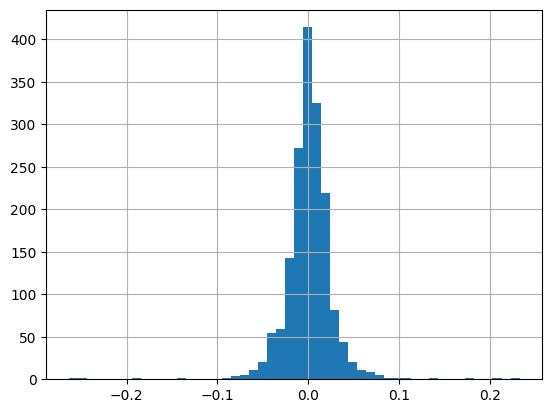

In [35]:
R['Adj Close'].hist(bins=50)

<Axes: xlabel='Date'>

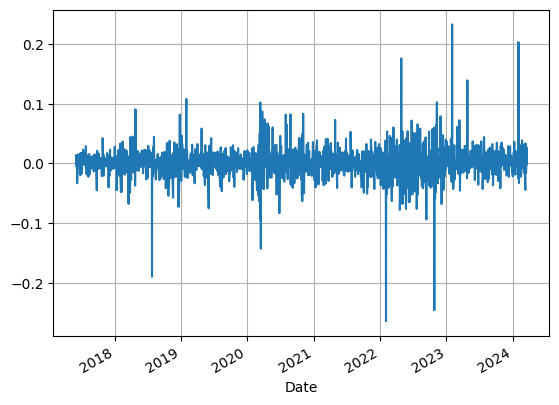

In [37]:
R['Adj Close'].plot(grid=True) # La media se conserva a lo largo del tiempo

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [ ]:
r=np.log(meta_yf/meta_yf.shift())
r['Adj Close'].hist(bins=50)

In [ ]:
r['Adj Close'].plot(grid=True)

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

___
# 2. Simulación de escenarios futuros de precios

Entonces, suponemos que el cambio porcentual de los precios (rendimientos diarios) tiene una distribución normal.

¿Cómo se caracteriza una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal)?

In [ ]:
names=['RIVN','LCID','RBLX']
start='2021-03-20'
end='2024-03-20'

datos=yf.download(names,start)['Close']
datos.head()

In [ ]:
datos.tail()

<Axes: xlabel='Date'>

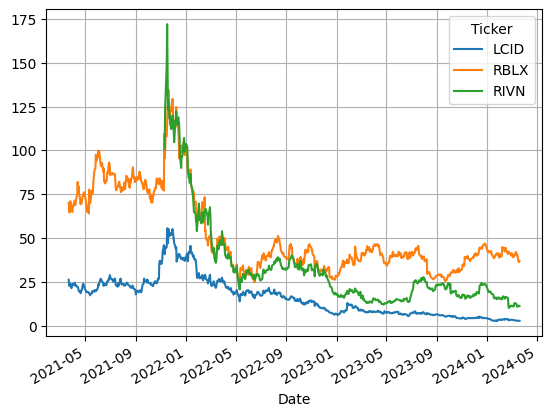

In [43]:
datos.plot(grid=True)

Habiendo caracterizado los rendimientos diarios como una variable aleatoria normal con la media y la varianza muestral obtenida de los datos del 2018, podemos generar números aleatorios con estas características para simular el comportamiento de los precios de cierre de las acciones en el 2019 (hay un supuesto de que las cosas no cambiarán fundamentalmente).

Sin embargo, cada simulación que hagamos nos conducirá a distintos resultados (los precios siguen evolucionando aleatoriamente). Entonces, lo que haremos es simular varios escenarios para así ver alguna tendencia y tomar decisiones.

Hagamos una una función que simule varios escenarios de rendimientos diarios y que devuelva un dataframe con esta simulación.

## 2.2 Proyección de precios

Por tanto, para calcular los precios, tenemos:

$$\begin{align}
p_i&=p_{i-1}(R_i+1)\\
p_{i+1}&=p_i(R_{i+1}+1)=p_{i-1}(R_i+1)(R_{i+1}+1)\\
&\vdots\\
p_{i+k}&=p_{i-1}(R_i+1)\cdots(R_{i+k}+1).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}(R_0+1)\cdots(R_{k}+1)$, donde $p_{-1}$ es el último precio reportado en el actual año.

## 2.3 Probabilidad Precio-Umbral

Ya que tenemos muchos escenarios de precios proyectados, podemos ver varias cosas. Por ejemplo, ¿cuál es la probabilidad de que el precio de cierre sobrepase algún valor umbral en algún momento?

___
Entonces, ya aprendimos a bajar datos con pandas-datareader. En específico, a partir de los precios de cierre ajustados obtuvimos los rendimientos diarios.

Suponiendo que los rendimientos diarios son un proceso estocástico estacionario de distribución normal, pudimos caracaterizarlo y proyectar varios escenarios de evolución de los precios (Montecarlo).

Con estas proyecciones pudimos calcular probabilidades de sobrepasar cierto precio umbral: toma de decisiones.